# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Wanda Armadianti
- **Email:** wandaarma13@gmail.com
- **ID Dicoding:** wandaarma

## Determine Business Questions

- Question 1: What is the best selling product categories?
- Question 2: How are customers distributed by state?

## Import Packages/Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

The data gathering process involves downloading a file from Google Drive using its ID and then reading the downloaded CSV file into a pandas DataFrame.

In [2]:
!gdown --id 13zrIHDuIc_pbXXUjjNb4OIpiiITATMz1
pd.set_option('display.max_columns', None)
customers = pd.read_csv('/content/customers_dataset.csv')
customers.head()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13zrIHDuIc_pbXXUjjNb4OIpiiITATMz1
To: /content/customers_dataset.csv
100% 9.03M/9.03M [00:00<00:00, 41.5MB/s]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
!gdown --id 1wV9I4a_Z2E80viMEDRZarpqnV2RjMGHW
orderitems = pd.read_csv('/content/order_items_dataset.csv')
orderitems.head()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wV9I4a_Z2E80viMEDRZarpqnV2RjMGHW
To: /content/order_items_dataset.csv
100% 15.4M/15.4M [00:00<00:00, 112MB/s] 


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
!gdown --id 1Z1ztZtQnxgdLI4AXL_mFR1Ttfd82KDLg
orders = pd.read_csv('/content/orders_dataset.csv')
orders.head()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Z1ztZtQnxgdLI4AXL_mFR1Ttfd82KDLg
To: /content/orders_dataset.csv
100% 17.7M/17.7M [00:00<00:00, 71.9MB/s]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
!gdown --id 1ZorokzK-lYQa0qEEyeTqfEgpc1YCfmUl
products = pd.read_csv('/content/products_dataset.csv')
products.head()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZorokzK-lYQa0qEEyeTqfEgpc1YCfmUl
To: /content/products_dataset.csv
100% 2.38M/2.38M [00:00<00:00, 163MB/s]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
!gdown --id 1uOQvPZwUt5rXrEI2bHL3jSvGcLniouTr
sellers = pd.read_csv('/content/sellers_dataset.csv')
sellers.head()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uOQvPZwUt5rXrEI2bHL3jSvGcLniouTr
To: /content/sellers_dataset.csv
100% 175k/175k [00:00<00:00, 79.8MB/s]


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Combine Data

Combining table aims to consolidate relevant information from different sources into a single dataset. This can make data analysis and manipulation more efficient, as it allows for easier access and comparison of related data. In this specific scenario, merging five tables likely helps in performing comprehensive analyses that involve information from customers, orders, order items, products, and sellers all in one consolidated dataset. This combined dataset can then be used for various analytical tasks such as customer segmentation, sales analysis, and inventory management.

In [7]:
# Combine table "customers" and "orders"
customers_orders = pd.merge(
    left=orders,
    right=customers,
    how="outer",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [8]:
# Combine table "orderitems", "products" and "sellers"
orderitems_products = pd.merge(
    left=orderitems,
    right=products,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
orderitems_products_sellers = pd.merge(
    left=orderitems_products,
    right=sellers,
    how="outer",
    left_on="seller_id",
    right_on="seller_id"
    )
orderitems_products_sellers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP


In [9]:
# Combine all tables
combine_all = pd.merge(
    left=customers_orders,
    right=orderitems_products_sellers,
    how="outer",
    left_on="order_id",
    right_on="order_id"
    )
combine_all.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP


### Assessing Data

In [10]:
# Check data structure
combine_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   customer_unique_id             113425 non-null  object 
 9   customer_zip_code_prefix       113425 non-null  int64  
 10  customer_city                  113425 non-null  object 
 11  customer_state                 113425 non-null  object 
 12  order_item_id                 

In [11]:
# Check null values
combine_all.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
seller_zip_c

In [12]:
# Check duplicate data
print("Jumlah duplikasi: ", combine_all.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
# Check the number of each value in the categorical column
categorical_columns = combine_all.select_dtypes(include='object').columns

for column in categorical_columns:
    print(f"Value counts for {column}:\n{combine_all[column].value_counts()}\n")

Value counts for order_id:
8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
07bcb0695fd4e3121e2fae21fbef3d28     1
573a63f55da869597574d6ce4e1719a3     1
2d2084741ee31a371ffe0b838051d0dc     1
811aa327b15973b2865ec0e0ede70374     1
66dea50a8b16d9b4dee7af250b4be1a5     1
Name: order_id, Length: 99441, dtype: int64

Value counts for customer_id:
fc3d1daec319d62d49bfb5e1f83123e9    21
bd5d39761aa56689a265d95d8d32b8be    20
be1b70680b9f9694d8c70f41fa3dc92b    20
adb32467ecc74b53576d9d13a5a55891    15
10de381f8a8d23fff822753305f71cae    15
                                    ..
4b63383d57d7b45e8c7df93cdbc5029d     1
3b84c81b13c1c7278b099793e720998f     1
1a66bf0ca8926c664ad542e9d551805d     1
226b95c7c8f8587f805a7c0c809e5170     1
edb027a75a1449115f6b43211ae02a24     1
Name: customer_id, Length: 99441, dtype:

In [14]:
# Check unique value
unique_value = combine_all.nunique()
unique_value

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
product_category_name               73
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm         

### Cleaning Data

Data cleaning involves two main processes:
- Converting data types to datetime format
- Removing null values.

Converting data types to datetime format ensures that date and time information is properly recognized and can be utilized for temporal analysis. Removing null values eliminates missing or incomplete data points, which helps maintain data integrity and ensures accurate analysis and modeling. These cleaning processes are crucial for preparing data for further analysis and ensuring that the data is accurate, reliable, and suitable for use in analytical tasks.

In [15]:
# Change column type to datetime
datetime_columns = ["shipping_limit_date", "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
cleaned_data = combine_all.copy()  # Salinan data utama
for column in datetime_columns:
    cleaned_data[column] = pd.to_datetime(cleaned_data[column])
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   customer_unique_id             113425 non-null  object        
 9   customer_zip_code_prefix       113425 non-null  int64         
 10  customer_city                  113425 non-null  object        
 11  

In [16]:
# Drop missing values
cleaned_data = cleaned_data.dropna()
cleaned_data.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state        

In [17]:
# Check the number of each value in the categorical column
categorical_columns_cleaned = cleaned_data.select_dtypes(include='object').columns

for column in categorical_columns_cleaned:
    print(f"Value counts for {column}:\n{cleaned_data[column].value_counts()}\n")

Value counts for order_id:
8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
71ae442d46d1764c665ba4c9e3073864     1
0d7409418627f0c642e73823145c505b     1
403065b674f9cd3a0ab4d217dac82725     1
47476a4cdc9f6c8f0fb1517e2e557c5e     1
66dea50a8b16d9b4dee7af250b4be1a5     1
Name: order_id, Length: 95129, dtype: int64

Value counts for customer_id:
fc3d1daec319d62d49bfb5e1f83123e9    21
bd5d39761aa56689a265d95d8d32b8be    20
be1b70680b9f9694d8c70f41fa3dc92b    20
adb32467ecc74b53576d9d13a5a55891    15
10de381f8a8d23fff822753305f71cae    15
                                    ..
72f564f4ab4a6a155d8b84a0b5ad8a2b     1
fa91f82f3d5d8fe6814035b85c202bff     1
29e96fb282c3989c38e825a01053c73d     1
4d3549e2ac2a97c5f787e4c1f557173d     1
edb027a75a1449115f6b43211ae02a24     1
Name: customer_id, Length: 95129, dtype:

In [18]:
# Check unique value
unique_value_cleaned = cleaned_data.nunique()
unique_value_cleaned

order_id                         95129
customer_id                      95129
order_status                         2
order_purchase_timestamp         94625
order_approved_at                87125
order_delivered_carrier_date     78921
order_delivered_customer_date    94341
order_estimated_delivery_date      445
customer_unique_id               92082
customer_zip_code_prefix         14844
customer_city                     4073
customer_state                      27
order_item_id                       21
product_id                       31625
seller_id                         2914
shipping_limit_date              90128
price                             5792
freight_value                     6902
product_category_name               73
product_name_lenght                 65
product_description_lenght        2944
product_photos_qty                  19
product_weight_g                  2169
product_length_cm                   99
product_height_cm                  102
product_width_cm         

In [19]:
cleaned_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP


## Exploratory Data Analysis (EDA)

### Data Statistics

In [20]:
cleaned_data.describe(include="all")

<ipython-input-20-11e4a3279614>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cleaned_data.describe(include="all")
<ipython-input-20-11e4a3279614>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cleaned_data.describe(include="all")
<ipython-input-20-11e4a3279614>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cleaned_data.describe(include="all")
<ipython-input-20-11e4a3279614>:1: Fu

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
count,108643,108643,108643,108643,108643,108643,108643,108643,108643,108643.000000,108643,108643,108643.000000,108643,108643,108643,108643.000000,108643.000000,108643,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000,108643,108643
unique,95129,95129,2,94625,87125,78921,94341,445,92082,NaN,4073,27,NaN,31625,2914,90128,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,588,22
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-07-31 18:03:02,2017-12-20 00:00:00,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP
freq,21,21,108636,21,23,48,21,593,24,NaN,17119,45814,NaN,520,1996,21,NaN,NaN,10952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27156,77484
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-19 23:11:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35145.541618,NaN,NaN,1.198632,NaN,NaN,NaN,120.085372,19.982591,NaN,48.807691,787.319781,2.210810,2095.564178,30.197629,16.588312,23.030467,24525.283700,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29890.595358,NaN,NaN,0.708541,NaN,NaN,NaN,182.039490,15.733505,NaN,10.008580,651.346697,1.721835,3744.019308,16.157227,13.433018,11.696960,27672.334748,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11310.000000,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,NaN,NaN


### Univariate Analysis

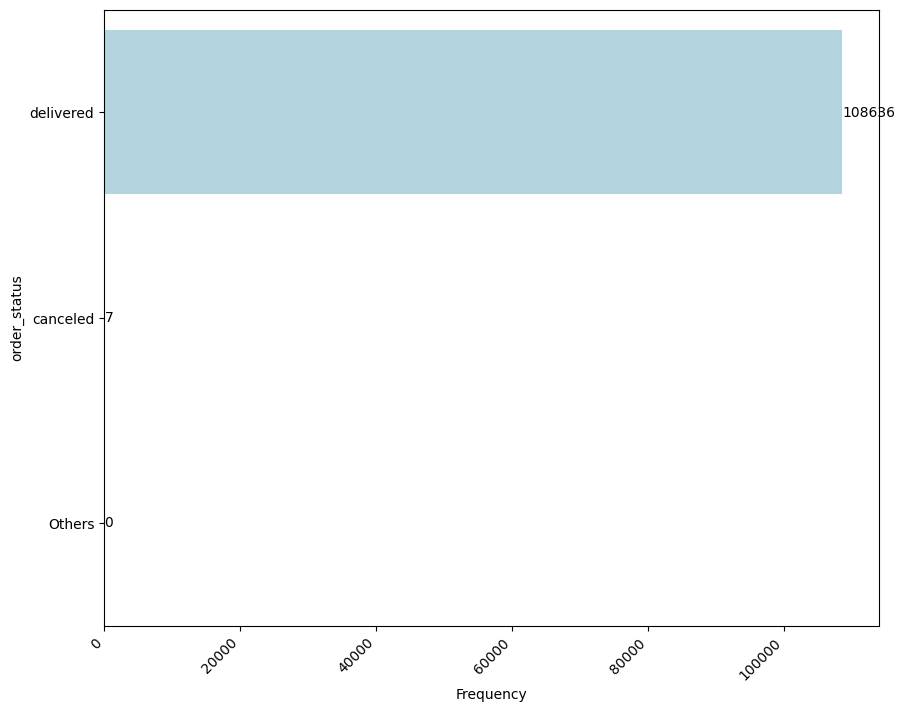

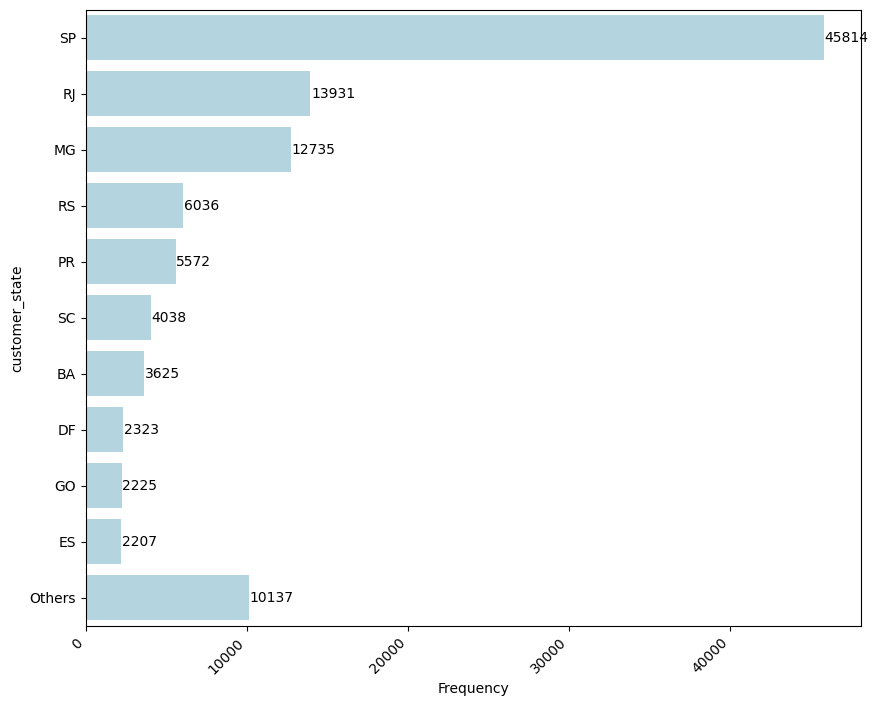

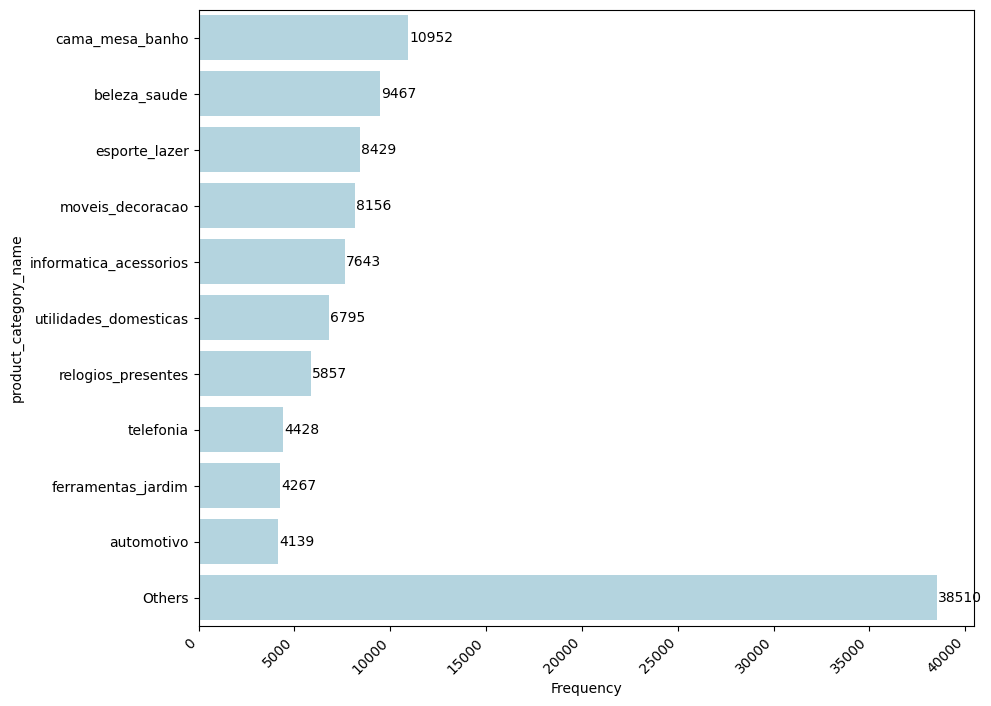

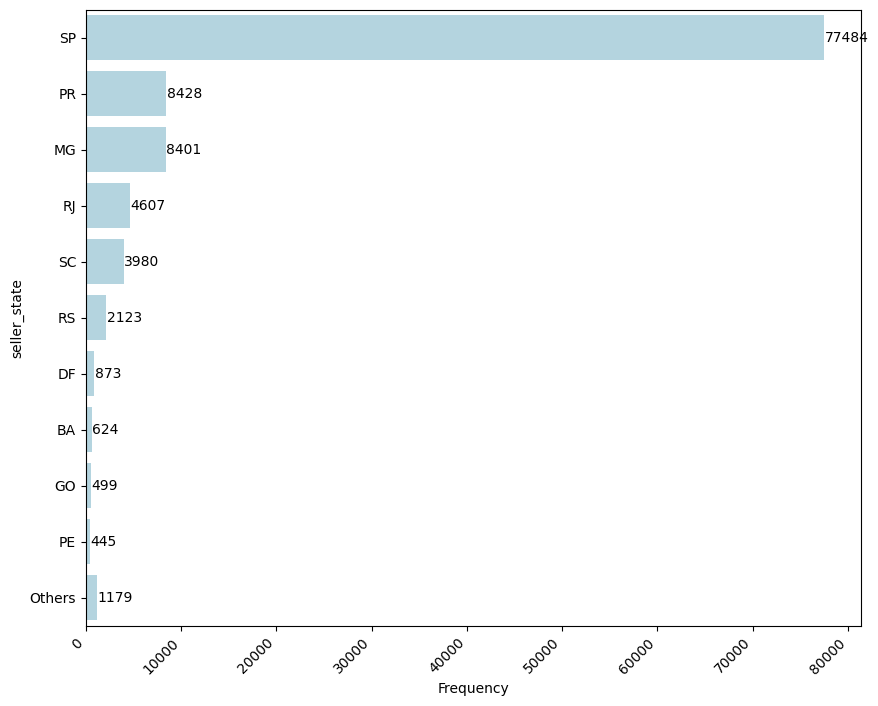

In [21]:
# Categorical columns
categorical_univariate = ["order_status", "customer_state", "product_category_name", "seller_state"]
for column in categorical_univariate:
    plt.figure(figsize=(10,8))  # Reduce the figure size

    # Count the frequency of each category
    category_counts = cleaned_data[column].value_counts()

    # Select the top 10 categories and combine the rest into one category "Others"
    top_categories = category_counts.head(10)
    other_categories_count = category_counts.sum() - top_categories.sum()
    top_categories['Others'] = other_categories_count

    # Create the countplot with modified categories
    ax = sn.barplot(x=top_categories.values, y=top_categories.index, color='lightblue')

    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha='right')

    # Annotate frequency counts
    for i, v in enumerate(top_categories.values):
        ax.text(v + 50, i, str(v), color='black', va='center')

    plt.show()


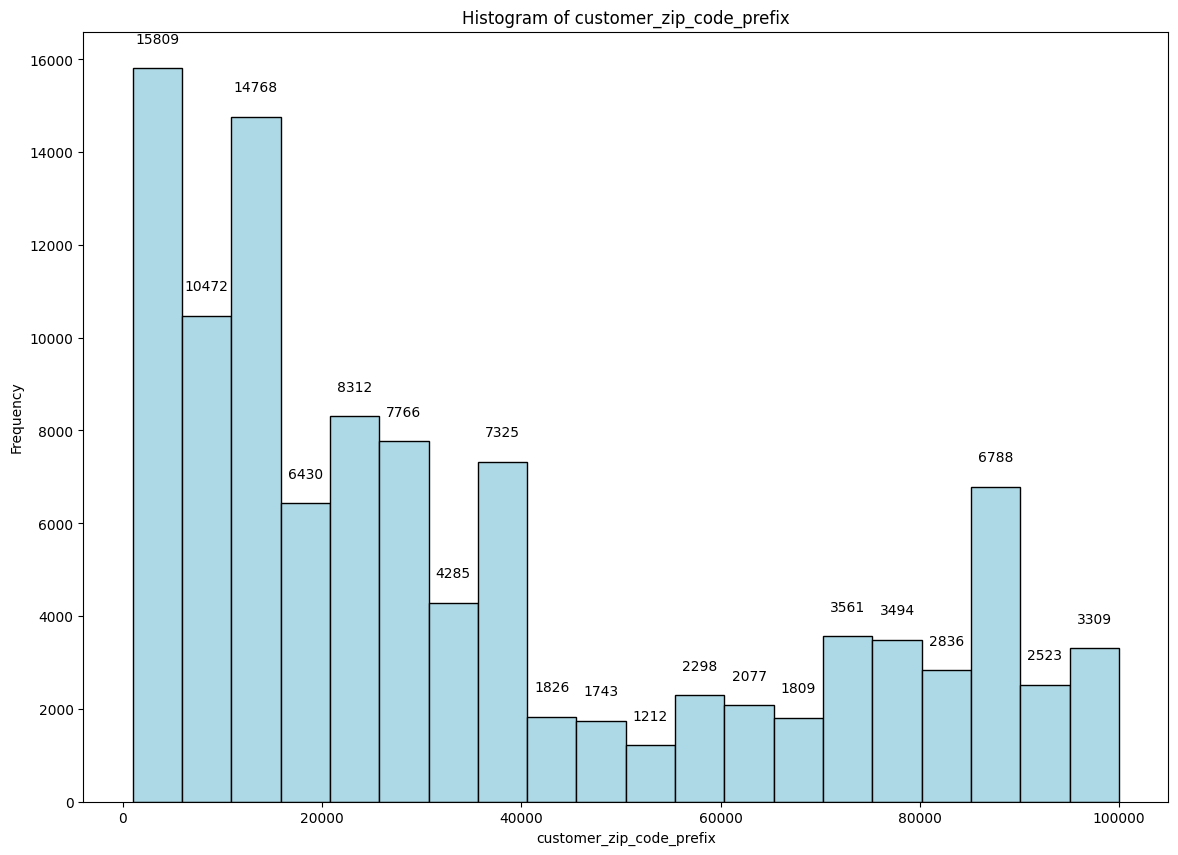

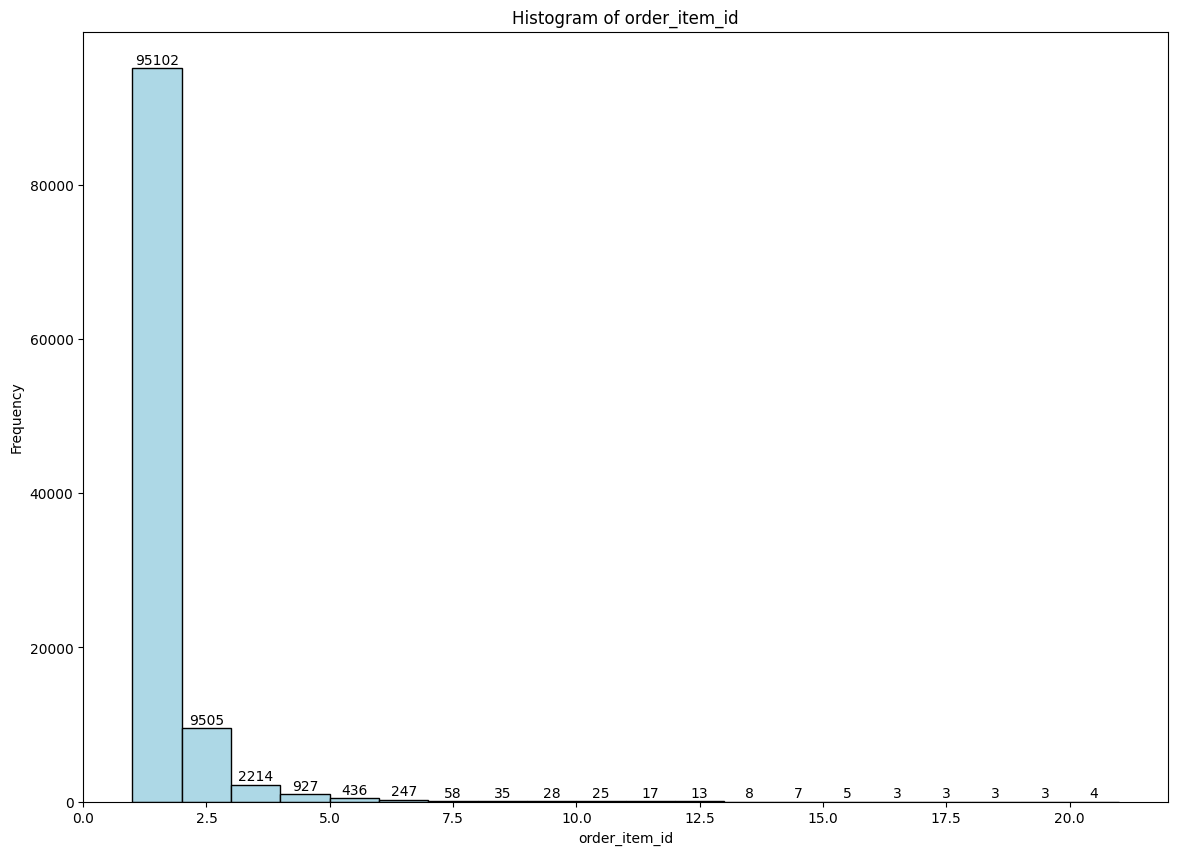

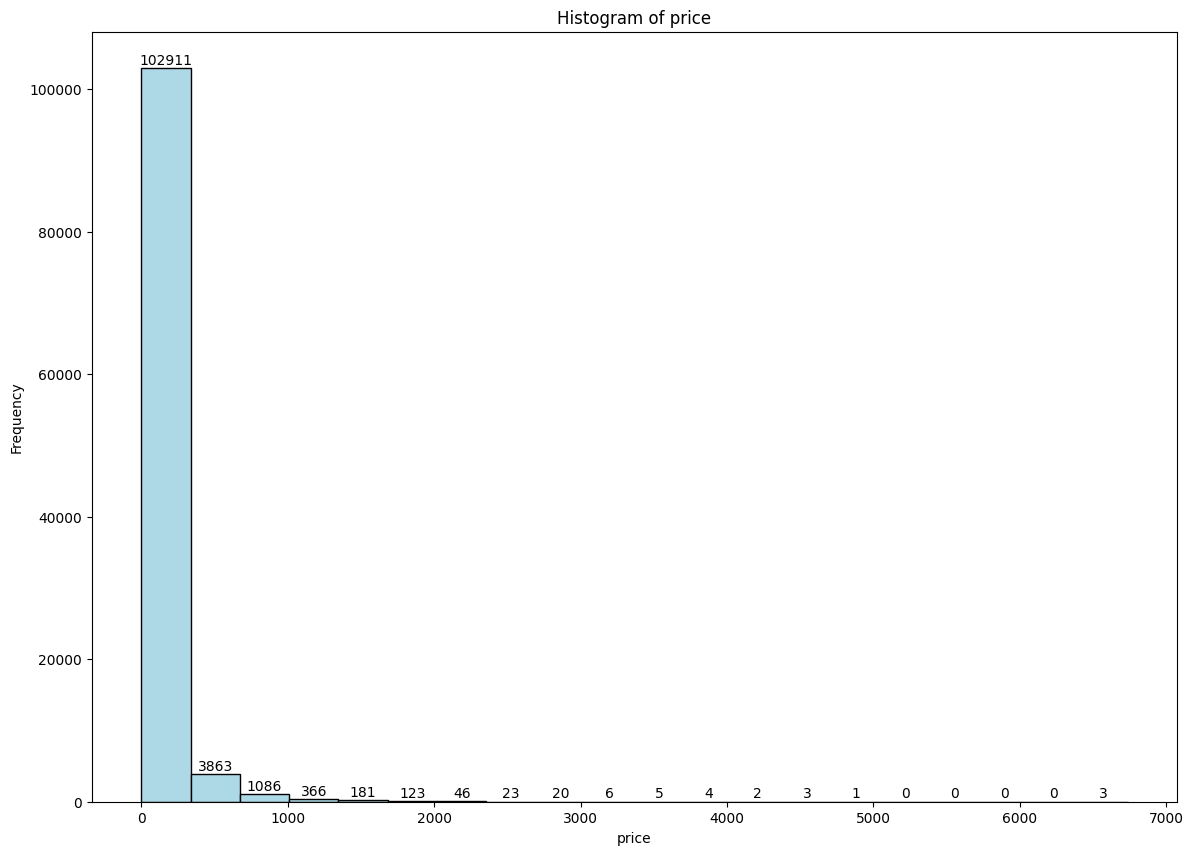

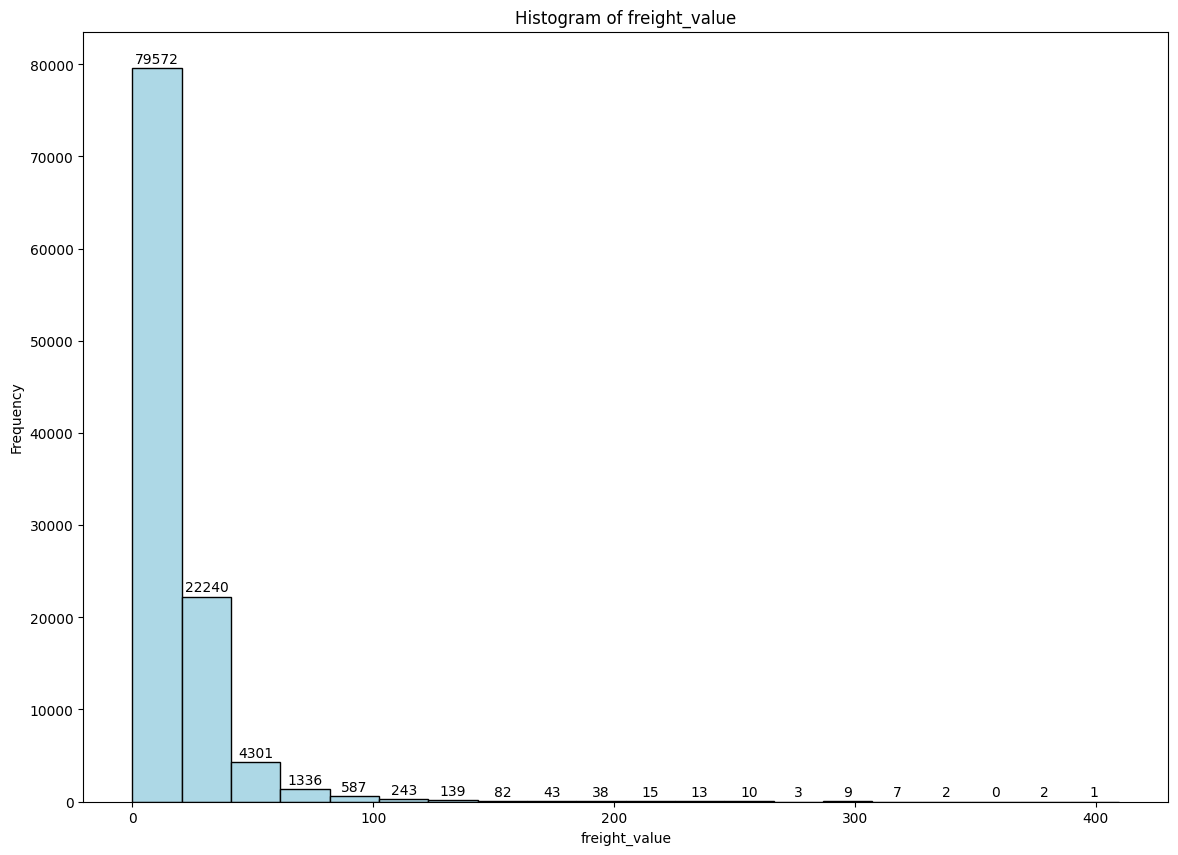

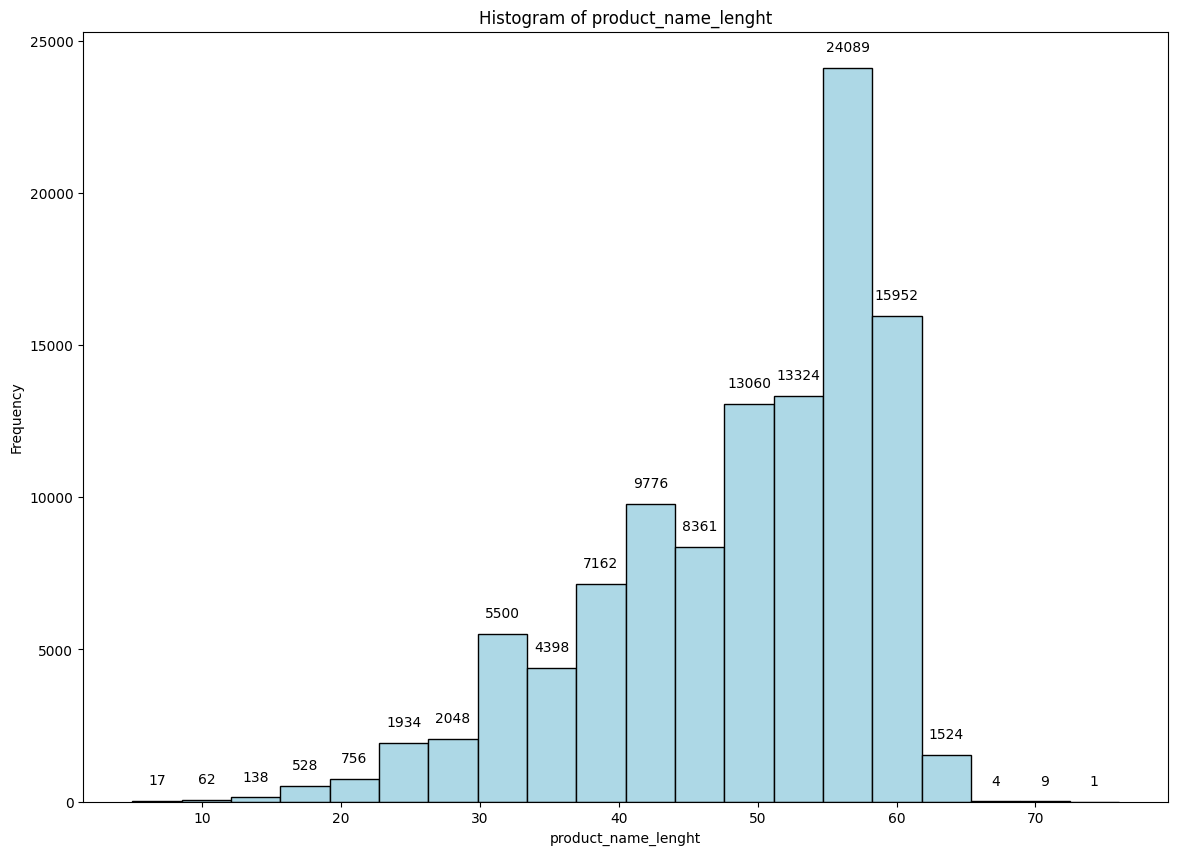

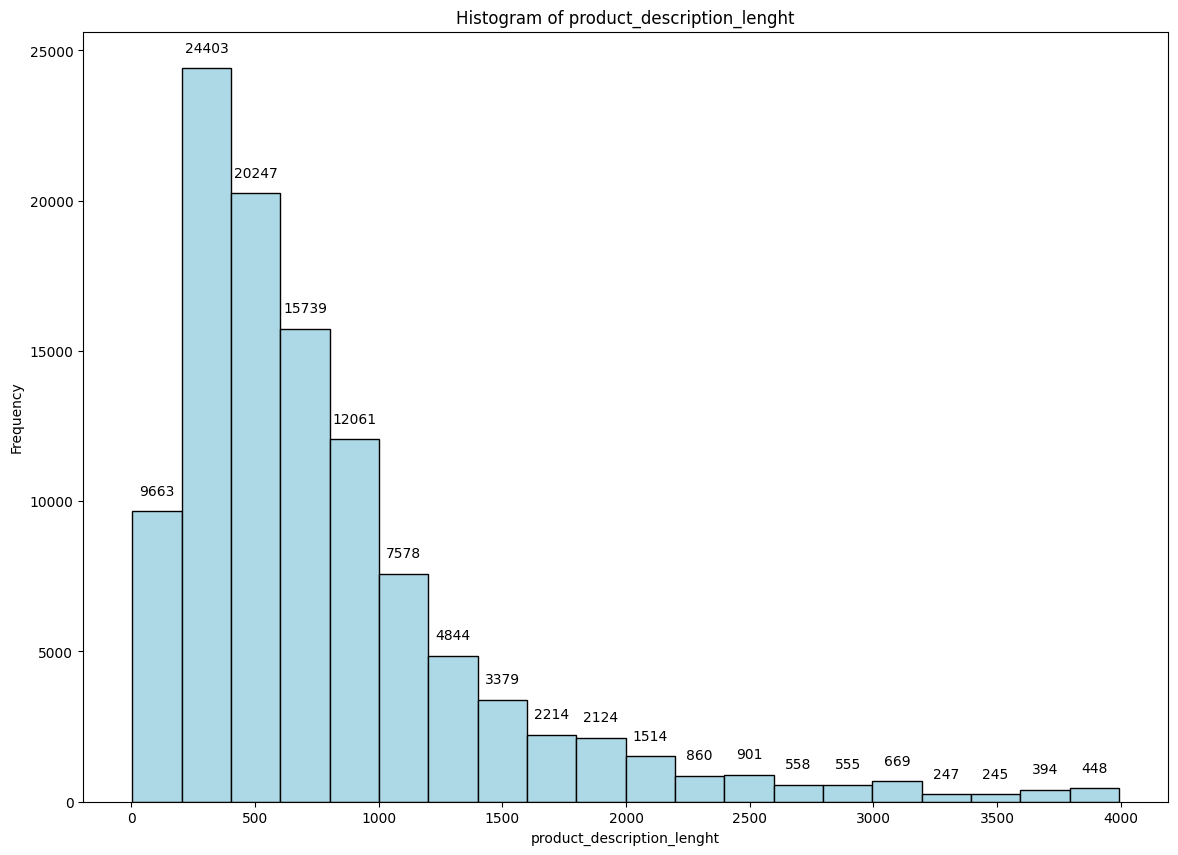

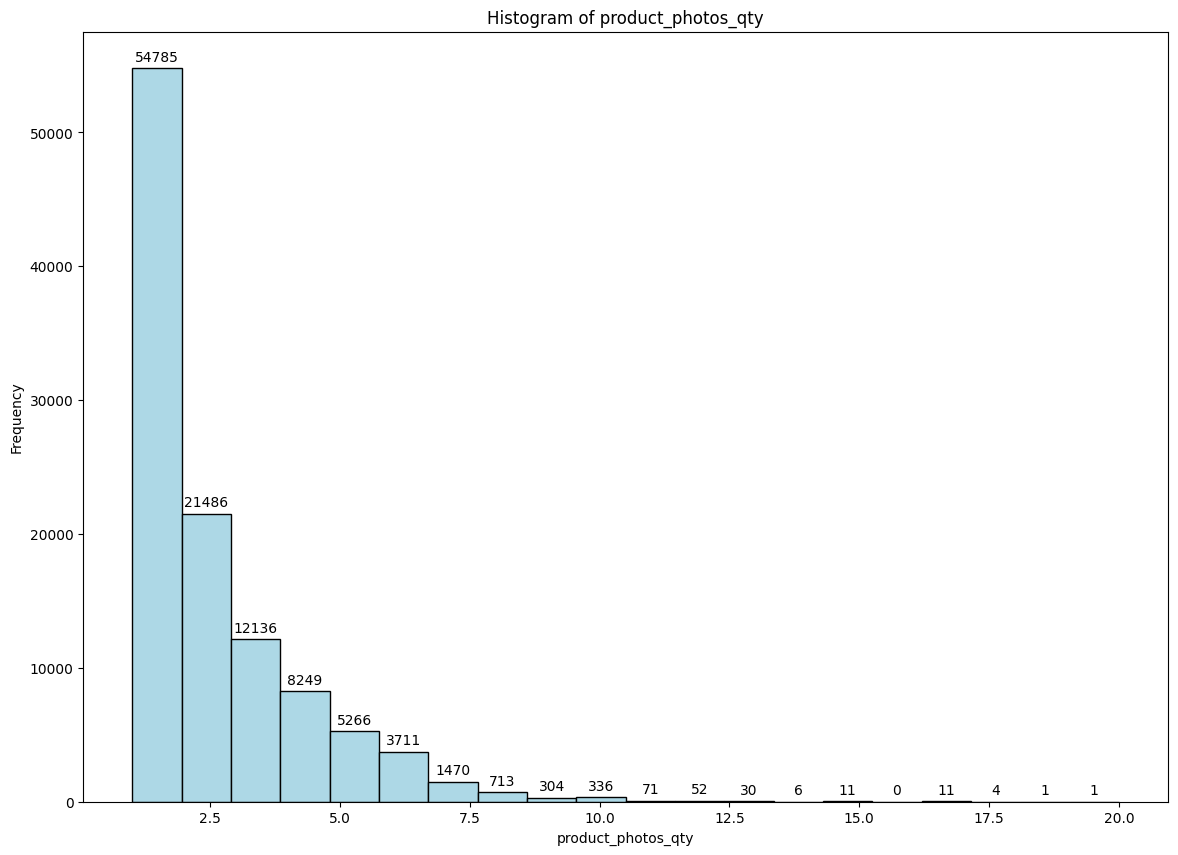

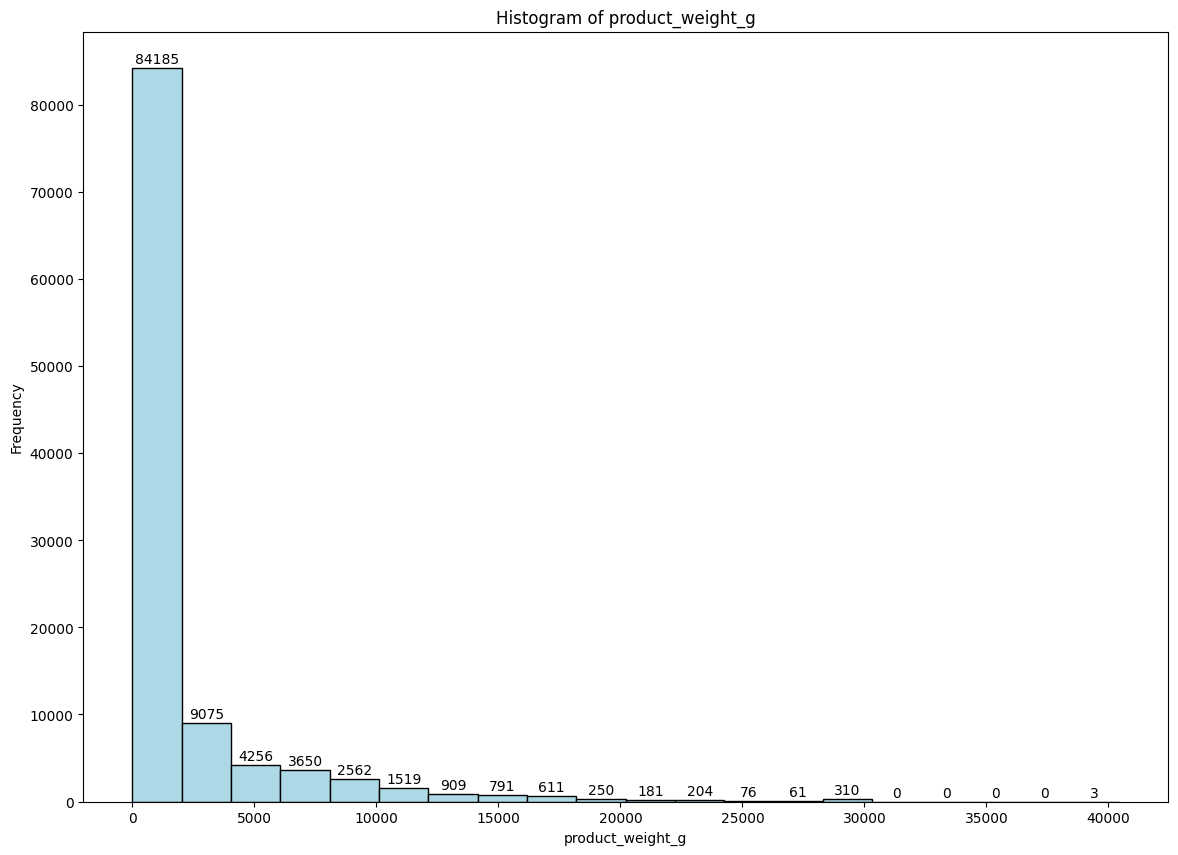

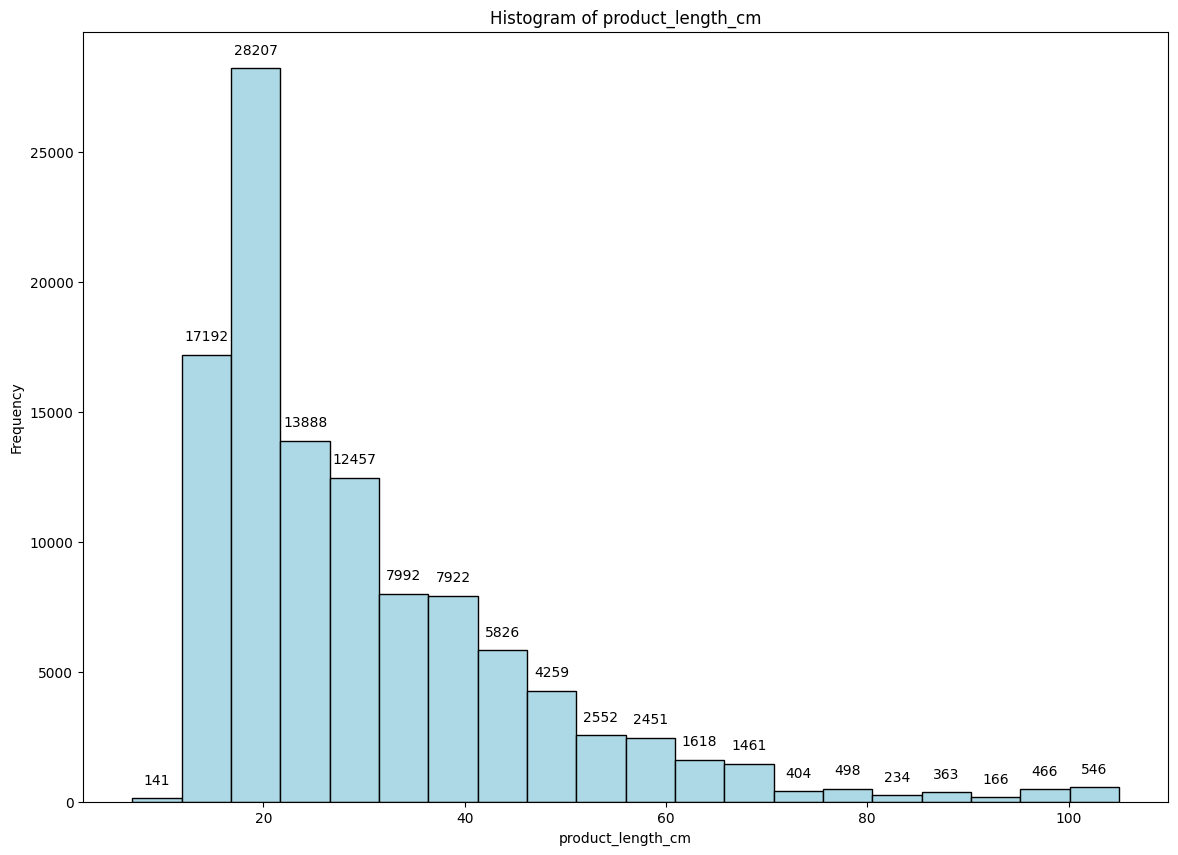

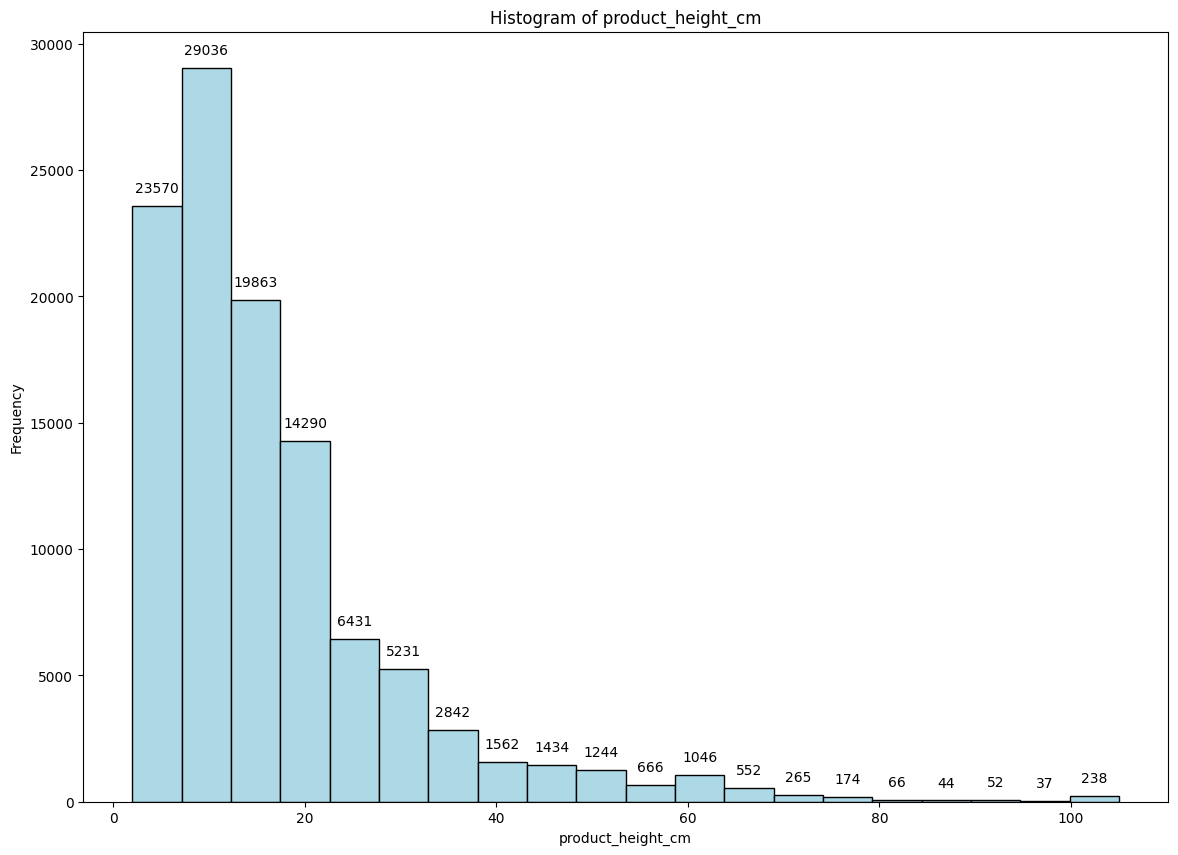

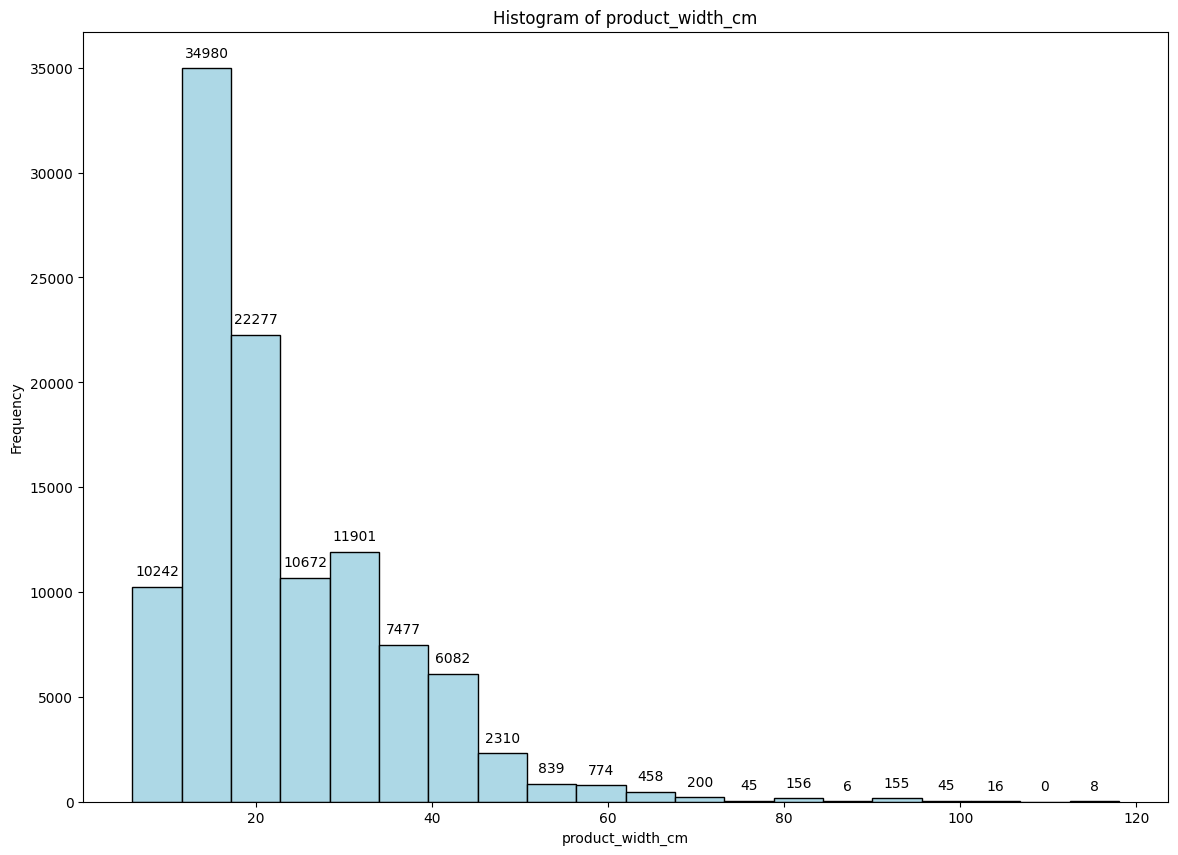

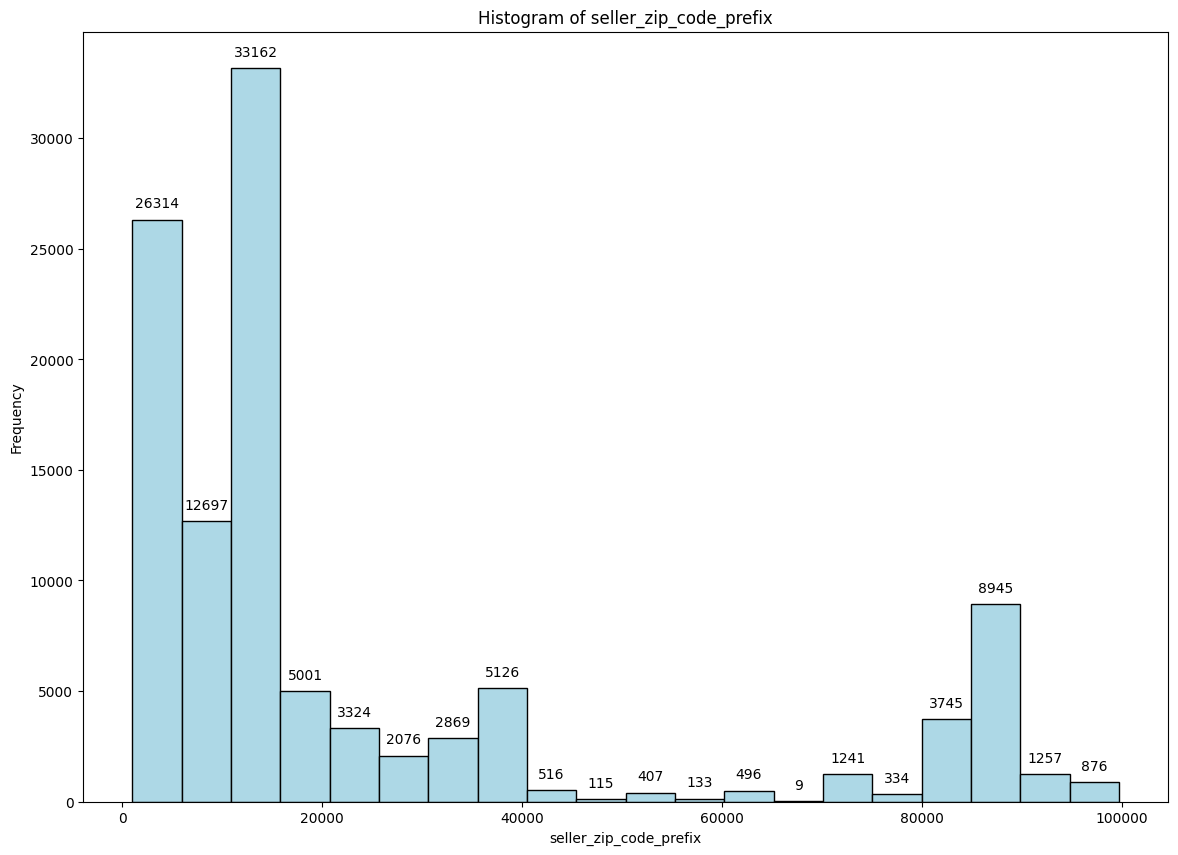

In [22]:
# Numerical columns
for column in cleaned_data.select_dtypes(include=np.number):
    plt.figure(figsize=(14, 10))
    plt.hist(cleaned_data[column], bins=20, edgecolor='k', color='lightblue')
    plt.title(f'Histogram of {column}')
    plt.ylabel('Frequency')
    plt.xlabel(column)

    # Calculate total frequency
    total_frequency = len(cleaned_data[column])

    # Annotate frequency counts
    for rect in plt.gca().patches:
        height = rect.get_height()
        frequency = int(height)
        plt.text(rect.get_x() + rect.get_width() / 2, height + 0.005 * total_frequency, frequency, ha='center')

    plt.show()


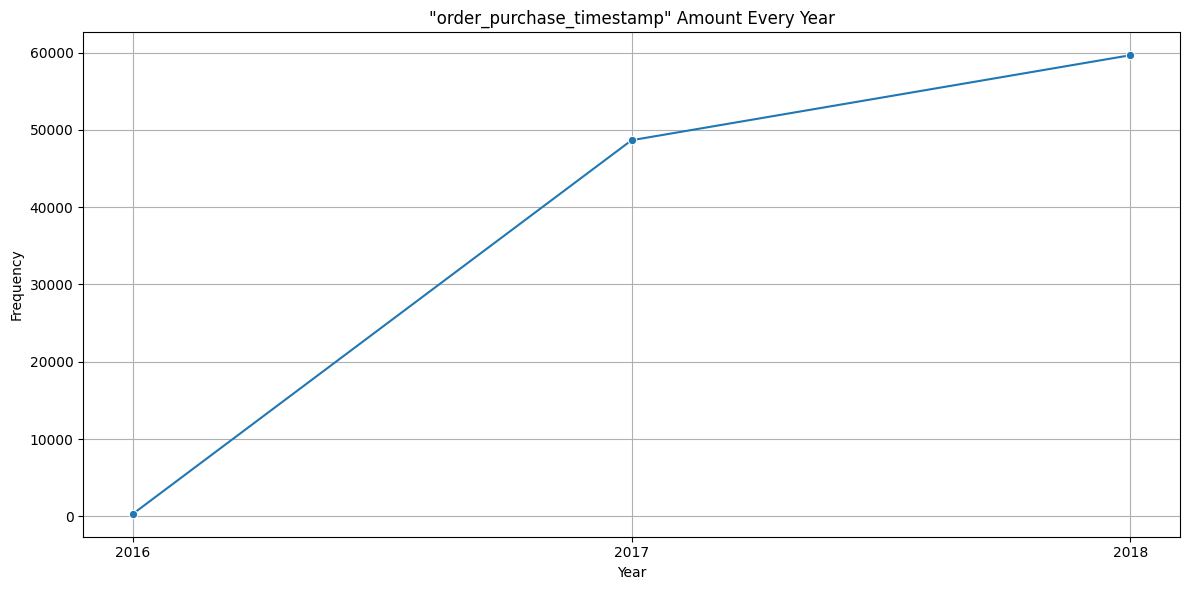

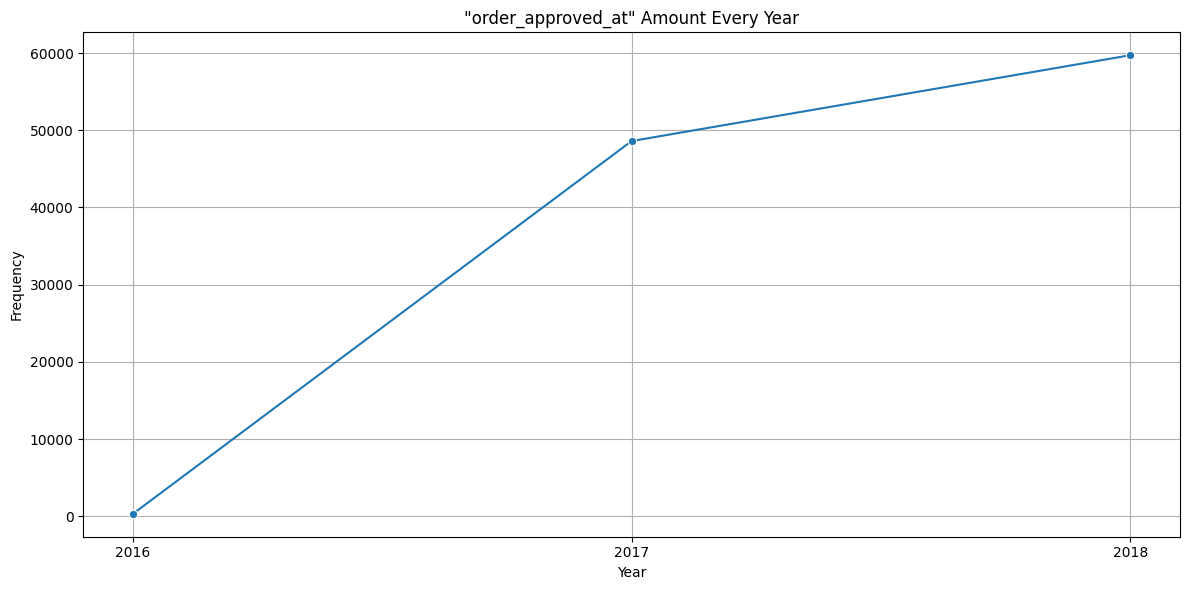

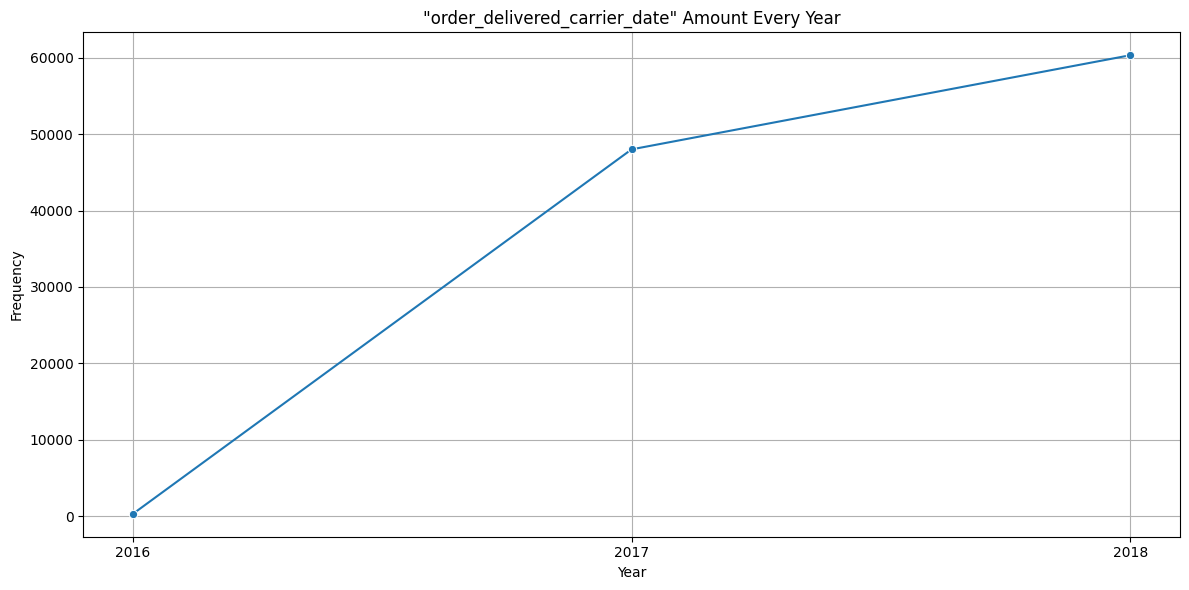

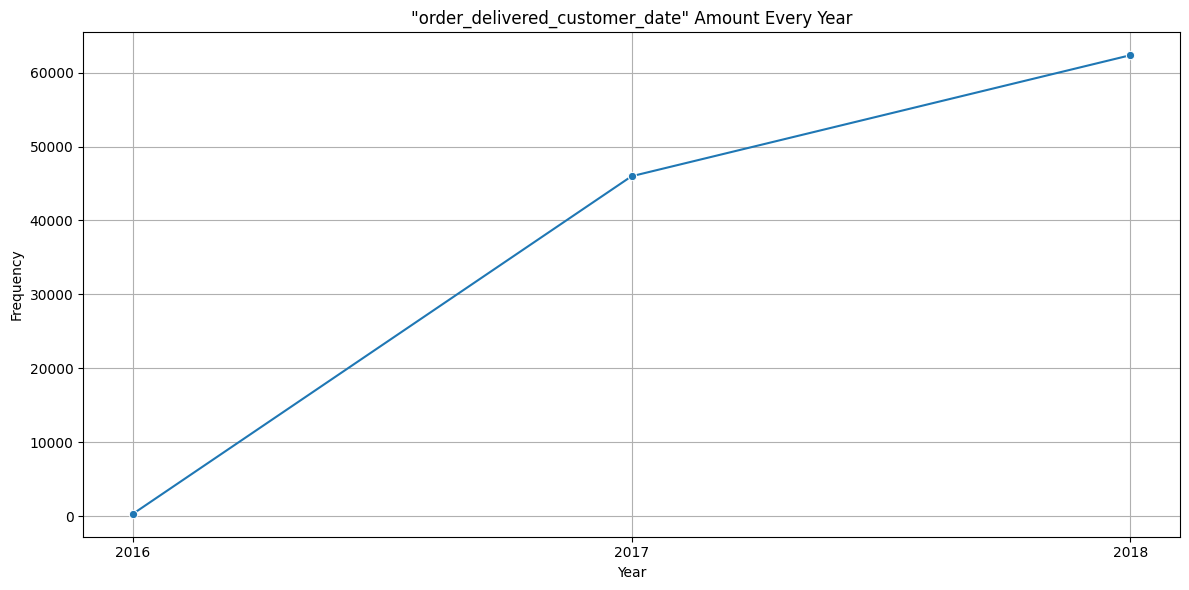

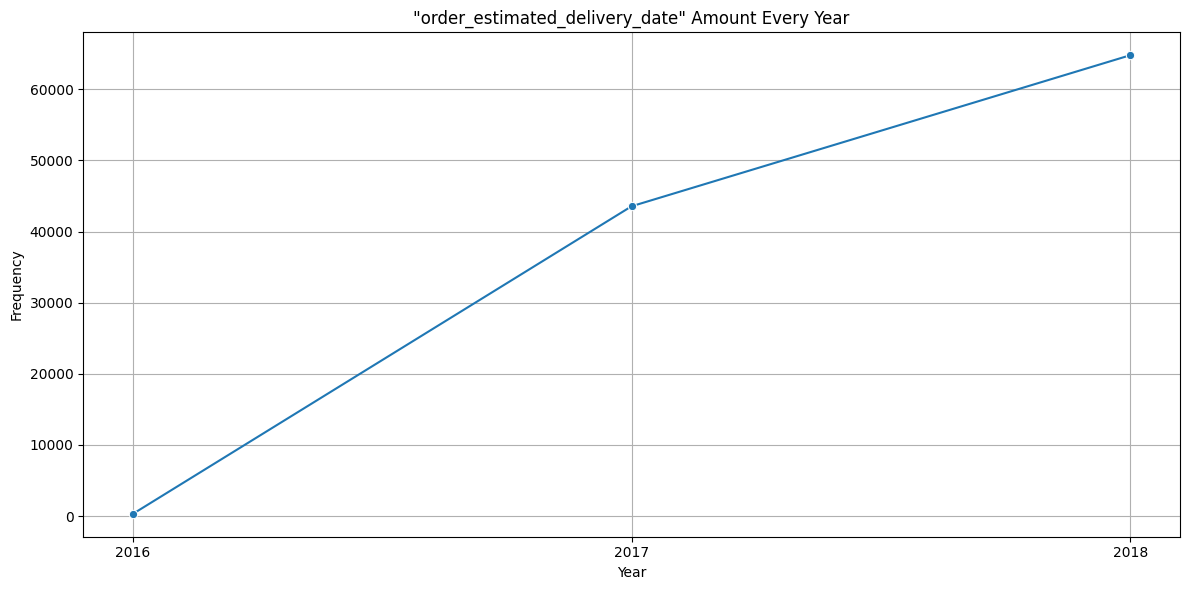

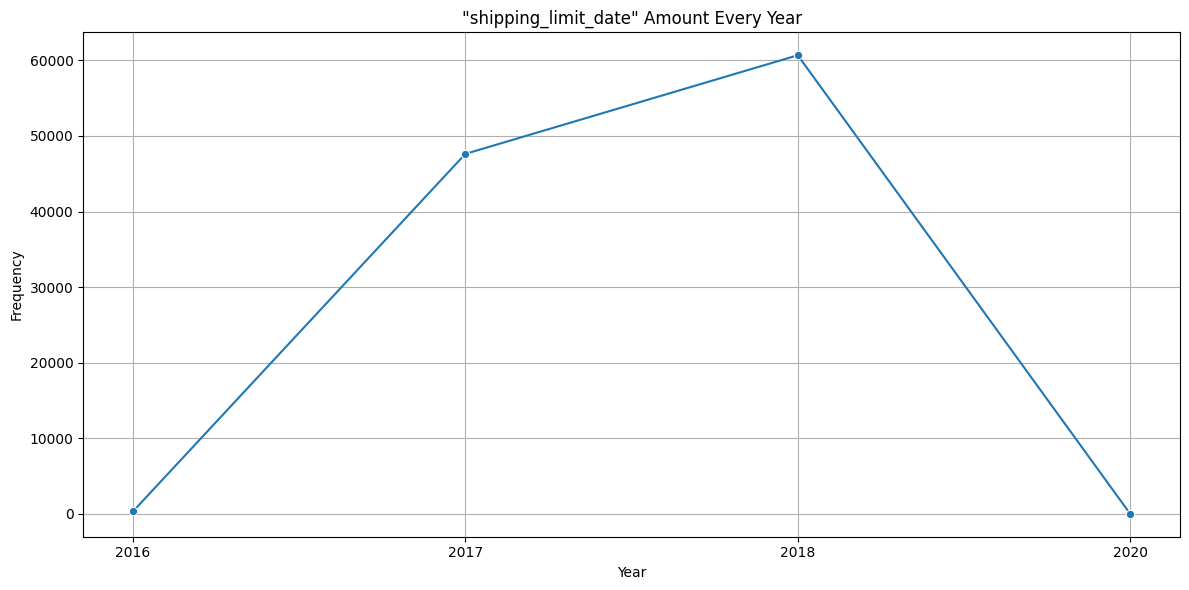

In [23]:
# Datetime columns
for column in cleaned_data.select_dtypes(include='datetime'):
    plt.figure(figsize=(12, 6))
    yearly_orders = cleaned_data.groupby(cleaned_data[column].dt.year).size().reset_index(name='count')
    yearly_orders[column] = yearly_orders[column].astype(str)  # Convert year to string format
    line_plot = sn.lineplot(x=column, y='count', data=yearly_orders, marker='o')
    plt.title(f'"{column}" Amount Every Year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Bivariate Analysis

To see the correlation between pairs of independent columns, a correlation plot and heatmap matrix are used. Correlation figures can be divided into the following 5 categories:
1. Strong Positive Correlation (0.5 to 1): When the correlation number is 1, it indicates a perfect positive linear relationship between two variables. This means that when one variable rises, the other also rises linearly.
2. Weak Positive Correlation (0 to 0.5): When the correlation number is between 0 and 1 (not reaching 1), it indicates a positive relationship between two variables, but not perfect. The closer to 1, the stronger the relationship.
3. No Correlation (0): A correlation number of 0 indicates that there is no linear relationship between two variables. This means changes in one variable do not have a linear effect on the other variables.
4. Weak Negative Correlation (0 to -0.5): When the correlation number is between 0 and -1 (not reaching -1), it indicates a negative relationship between two variables, but not perfect. The closer to -1, the stronger the relationship.
5. Strong Negative Correlation(-0.5 to -1): When the correlation number is -1, it indicates a perfect negative linear relationship between two variables. This means that when one variable rises, the other falls linearly.

In [24]:
numeric_columns = cleaned_data.select_dtypes(include=[np.number])
cor_data = numeric_columns.corr(method='pearson')
cor_data.round(2)

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
customer_zip_code_prefix,1.00,-0.00,0.04,0.23,0.02,0.02,0.02,0.00,0.01,0.01,-0.01,0.08
order_item_id,-0.00,1.00,-0.06,-0.03,-0.02,-0.01,-0.06,-0.00,0.01,0.03,-0.01,-0.02
price,0.04,-0.06,1.00,0.41,0.02,0.20,0.05,0.34,0.14,0.22,0.17,0.09
freight_value,0.23,-0.03,0.41,1.00,0.03,0.09,0.02,0.61,0.31,0.39,0.32,0.15
product_name_lenght,0.02,-0.02,0.02,0.03,1.00,0.09,0.15,0.02,0.06,-0.03,0.07,-0.03
product_description_lenght,0.02,-0.01,0.20,0.09,0.09,1.00,0.12,0.06,0.01,0.07,-0.07,0.06
product_photos_qty,0.02,-0.06,0.05,0.02,0.15,0.12,1.00,0.02,0.05,-0.03,0.01,-0.04
product_weight_g,0.00,-0.00,0.34,0.61,0.02,0.06,0.02,1.00,0.46,0.58,0.51,0.01
product_length_cm,0.01,0.01,0.14,0.31,0.06,0.01,0.05,0.46,1.00,0.19,0.53,0.03
product_height_cm,0.01,0.03,0.22,0.39,-0.03,0.07,-0.03,0.58,0.19,1.00,0.28,0.01


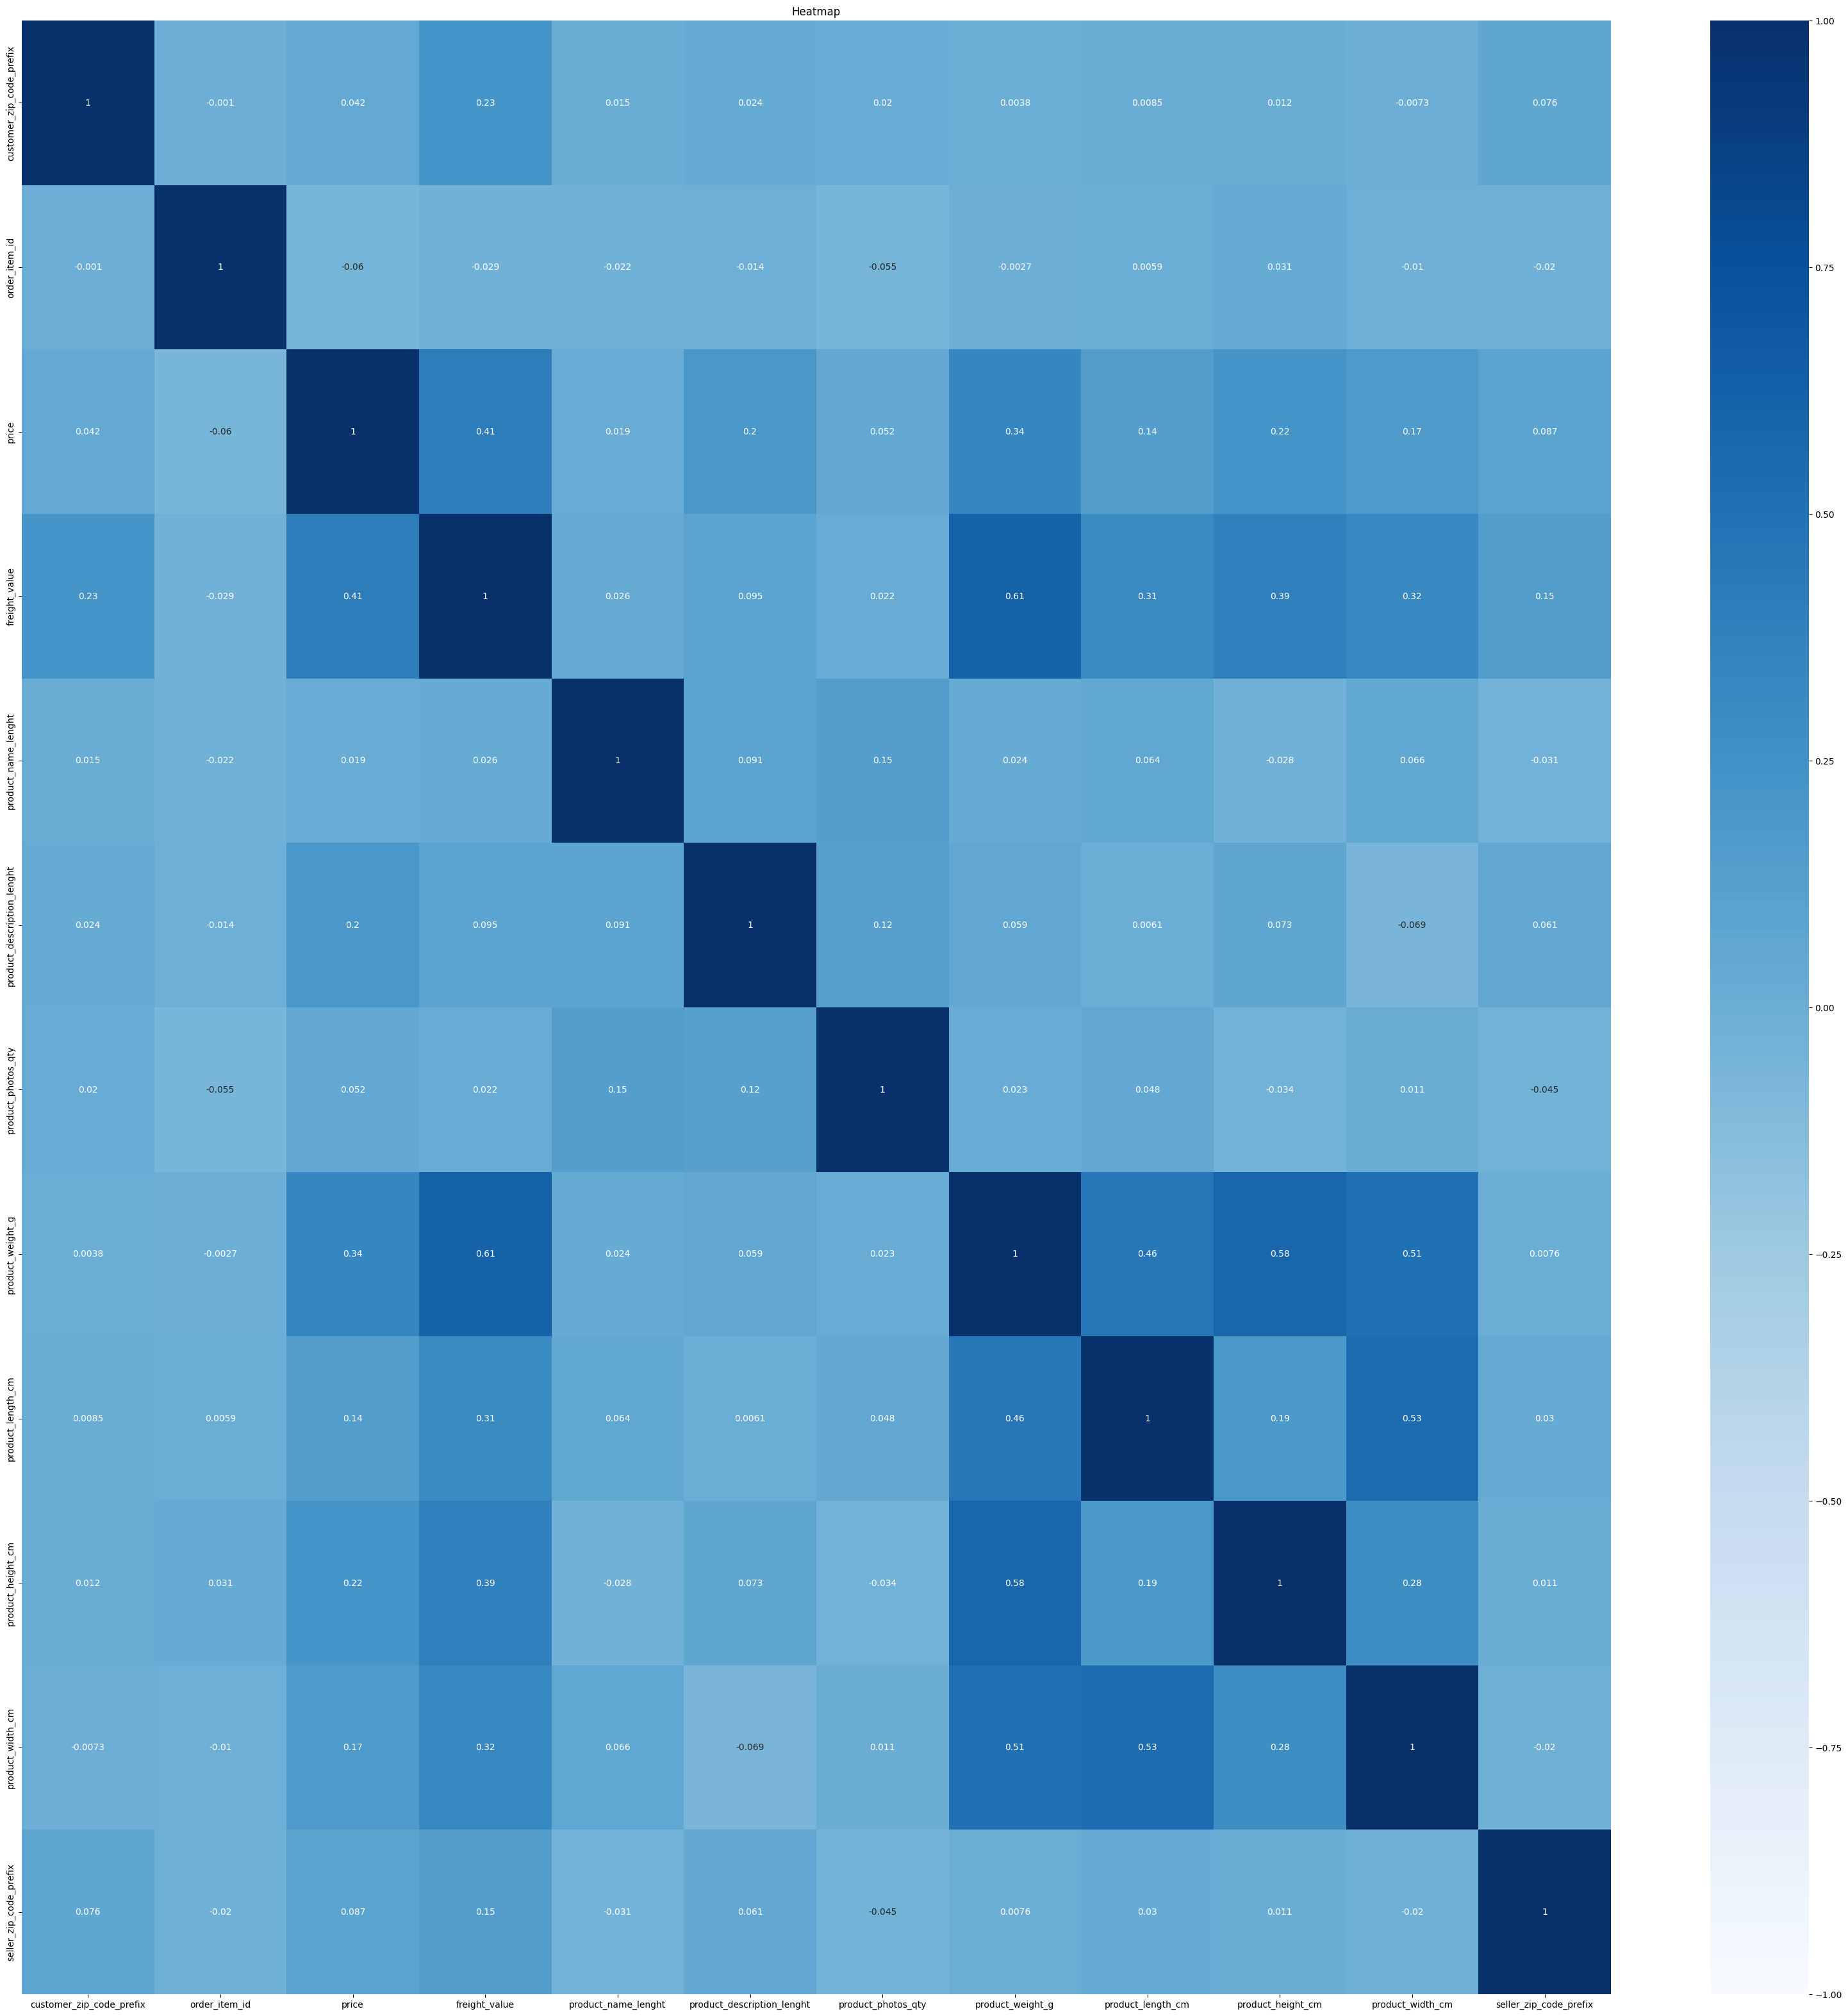

In [25]:
plt.figure(figsize=(40, 40))
sn.heatmap(cor_data, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Heatmap')
plt.show()

From the heatmap matrix above, it can be seen that those that have a high correlation are the product_weight and freight_value columns with a correlation value of 0.61.

## Visualization & Explanatory Analysis

### Question 1: What is the best selling product categories?

- This analysis enables decision-makers to understand which product categories are most in demand among customers. With this information, businesses can allocate resources effectively, tailor marketing strategies, and optimize product offerings to capitalize on the popularity of these top-selling categories.
- The visualization displays the top 10 best-selling product categories. Each bar in the horizontal graph represents the frequency of sales for each product category. By limiting the visualization to only the top 10 categories, we can effectively observe the most popular product categories without overwhelming detail. The top-selling product categories are highlighted in light blue, while the other categories are displayed in light gray.

In [26]:
# Check value count of product category
pd.set_option('display.max_rows', None)
sum_order_items = cleaned_data['product_category_name'].value_counts()
sum_order_items

cama_mesa_banho                                   10952
beleza_saude                                       9467
esporte_lazer                                      8429
moveis_decoracao                                   8156
informatica_acessorios                             7643
utilidades_domesticas                              6795
relogios_presentes                                 5857
telefonia                                          4428
ferramentas_jardim                                 4267
automotivo                                         4139
brinquedos                                         4030
cool_stuff                                         3715
perfumaria                                         3342
bebes                                              2981
eletronicos                                        2729
papelaria                                          2466
fashion_bolsas_e_acessorios                        1986
pet_shop                                        

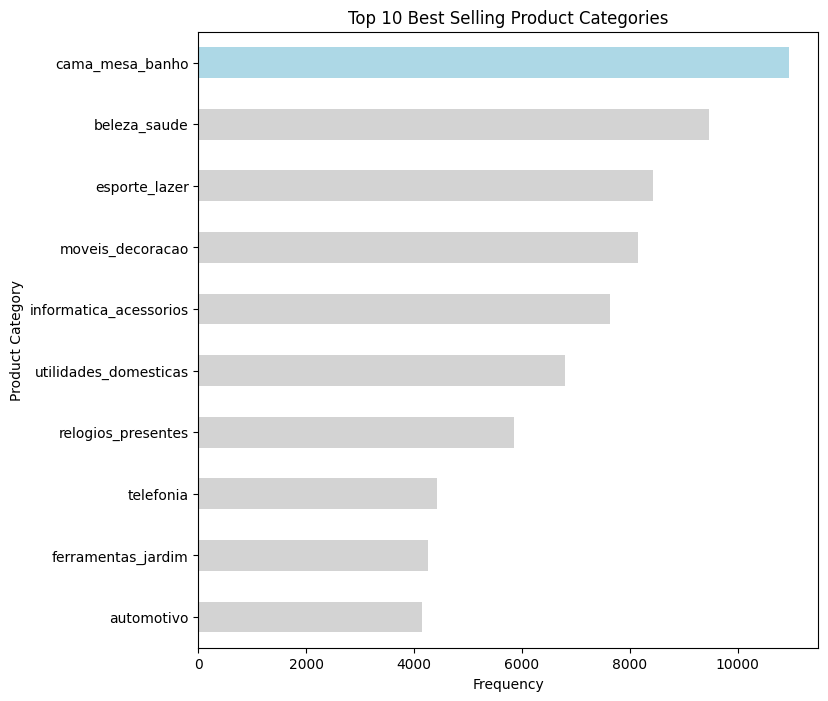

In [27]:
# Top 10 best selling product categories
category_counts = cleaned_data['product_category_name'].value_counts()
top_categories = category_counts.head(10).sort_values(ascending=True)
colors = ['lightgray'] * len(top_categories)
colors[-1] = 'lightblue'

plt.figure(figsize=(8, 8))
top_categories.plot(kind='barh', color=colors)
plt.title('Top 10 Best Selling Product Categories')
plt.xlabel('Frequency')
plt.ylabel('Product Category')
plt.show()

From bar chart above, we know that the best selling product categories is cama mesa banho

### Question 2: How are customers distributed by state?

This analysis aims to describes the distribution of customers by state. The data used is cleaned customer data, where calculate the number of unique customers in each state. There are 10 states with the highest number of customers displayed in the graph, allowing us to focus on the most significant states. States with the highest customer frequency, marked in light blue, indicate a dominant presence in the number of customers.This approach enhances the effectiveness of the visualization by reducing complexity and facilitating data interpretation.

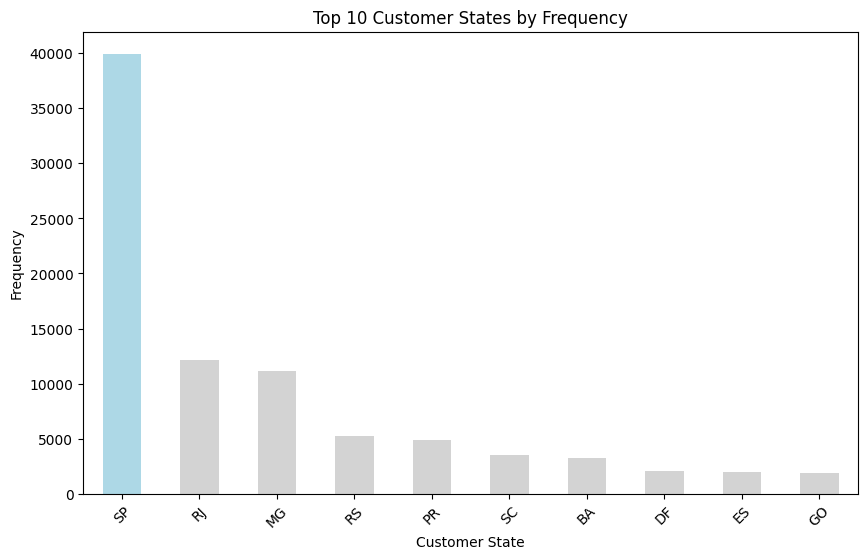

In [28]:
state_frequency = cleaned_data.groupby('customer_state')['customer_id'].nunique().nlargest(10)
plt.figure(figsize=(10, 6))
colors = ['lightgrey' if state != state_frequency.idxmax() else 'lightblue' for state in state_frequency.index]

state_frequency.plot(kind='bar', color=colors)
plt.title('Top 10 Customer States by Frequency')
plt.xlabel('Customer State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

From bar chart above, customer distribution tends to be mostly in Sao Paulo, Brazil.

## RFM Analysis

RFM analysis (Recency, Frequency, Monetary) aims to analyse segment customers based on their purchasing behavior. It calculates recency, frequency, and monetary value metrics for each customer, assigns corresponding RFM scores using quartiles, computes total RFM scores, and segments customers into categories such as Best Customers, Loyal Customers, Potential Loyalists, and New Customers. This segmentation facilitates targeted marketing and customer relationship management strategies by identifying high-value customers and understanding their specific needs and preferences.

In [29]:
# Calculate Recency
current_date = pd.to_datetime('2024-03-04')
cleaned_data['Recency'] = (current_date - cleaned_data['order_purchase_timestamp']).dt.days

# Calculate Frequency
frequency_data = cleaned_data.groupby('customer_unique_id')['order_id'].count().reset_index()
frequency_data.columns = ['customer_unique_id', 'Frequency']

# Calculate Monetary Value
monetary_data = cleaned_data.groupby('customer_unique_id')['price'].sum().reset_index()
monetary_data.columns = ['customer_unique_id', 'Monetary']

# Merge Recency, Frequency, and Monetary Value
rfm_data = pd.merge(frequency_data, monetary_data, on='customer_unique_id')
rfm_data = pd.merge(rfm_data, cleaned_data[['customer_unique_id', 'Recency']], on='customer_unique_id')

# Assign RFM Scores
quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

def recency_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.50]:
        return 3
    elif x <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

def frequency_monetary_score(x, c):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.50]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4

rfm_data['RecencyScore'] = rfm_data['Recency'].apply(recency_score)
rfm_data['FrequencyScore'] = rfm_data['Frequency'].apply(frequency_monetary_score, c='Frequency')
rfm_data['MonetaryScore'] = rfm_data['Monetary'].apply(frequency_monetary_score, c='Monetary')

# Calculate total RFM score for each customer
rfm_data['TotalScore'] = rfm_data['RecencyScore'] + rfm_data['FrequencyScore'] + rfm_data['MonetaryScore']

# Define a function to segment customers based on total RFM score
def segment_customer(total_score):
    if total_score >= 10:
        return 'Best Customers'
    elif 7 <= total_score < 10:
        return 'Loyal Customers'
    elif 5 <= total_score < 7:
        return 'Potential Loyalists'
    else:
        return 'New Customers'

# Apply the segment_customer function to create the 'Segment' column
rfm_data['Segment'] = rfm_data['TotalScore'].apply(segment_customer)

# Output RFM analysis results
print(rfm_data.head())


                 customer_unique_id  Frequency  Monetary  Recency  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1    129.90     2124   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1     18.90     2127   
2  0000f46a3911fa3c0805444483337064          1     69.00     2550   
3  0000f6ccb0745a6a4b88665a16c9f078          1     25.99     2334   
4  0004aac84e0df4da2b147fca70cf8255          1    180.00     2301   

   RecencyScore  FrequencyScore  MonetaryScore  TotalScore  \
0             4               1              3           8   
1             4               1              1           6   
2             1               1              2           4   
3             2               1              1           4   
4             2               1              4           7   

               Segment  
0      Loyal Customers  
1  Potential Loyalists  
2        New Customers  
3        New Customers  
4      Loyal Customers  


<ipython-input-29-84c348ef6bc9>:18: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])


In [30]:
rfm_data.describe()

,Frequency,Monetary,Recency,RecencyScore,FrequencyScore,MonetaryScore,TotalScore
count,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000,108643.00000
mean,1.505417,163.224441,2251.749906,2.503392,1.613293,2.492595,6.60928
std,1.334783,273.374481,152.549505,1.117948,1.069992,1.119426,2.10269
min,1.000000,0.850000,2013.000000,1.000000,1.000000,1.000000,3.00000
25%,1.000000,49.900000,2128.000000,2.000000,1.000000,1.000000,5.00000
50%,1.000000,99.000000,2232.000000,3.000000,1.000000,2.000000,6.00000
75%,2.000000,178.500000,2361.000000,4.000000,3.000000,3.000000,8.00000
max,24.000000,13440.000000,2726.000000,4.000000,4.000000,4.000000,12.00000


### Visualize Recency Distribution

This visualization shows the distribution of the last time of purchase (Recency) from customers. The x-axis shows the recency time range in days, while the y-axis shows the frequency of the number of customers who have recency in that time range. With this visualization, we can see how “fresh” customer's last purchase was.

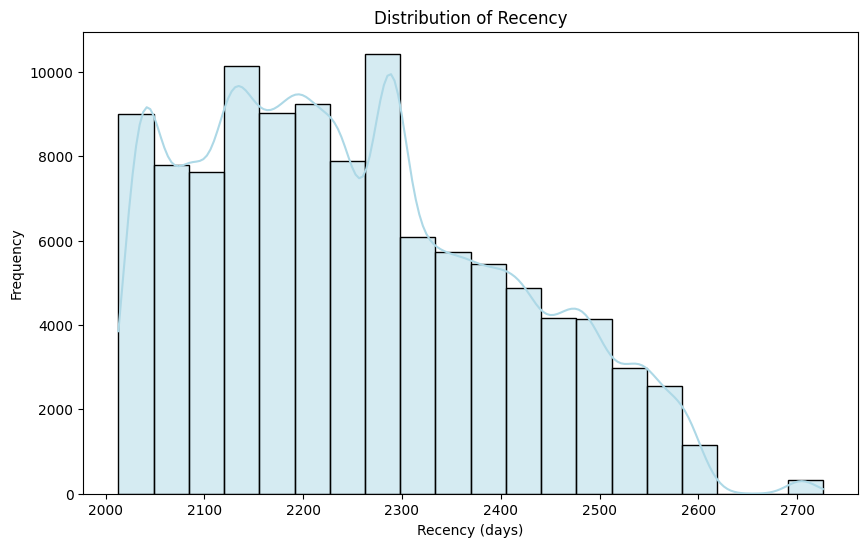

In [31]:
plt.figure(figsize=(10, 6))
sn.histplot(rfm_data['Recency'], bins=20, kde=True, color='lightblue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

### Visualize Frequency Distribution

This visualization shows the distribution of purchasing frequency (Frequency) from customers. The x-axis shows the number of purchases, while the y-axis shows the frequency of the number of customers who have that purchase frequency. With this visualization, we can understand how often the customers make purchases.

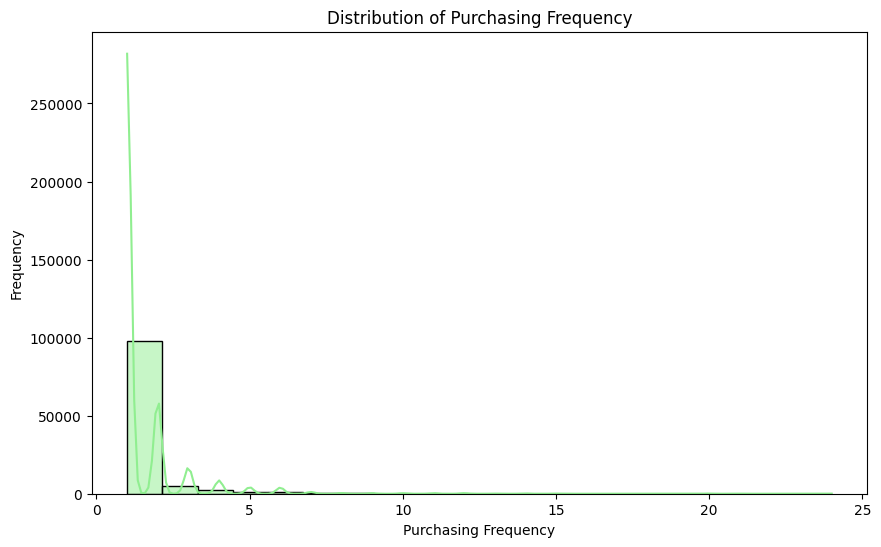

In [32]:
plt.figure(figsize=(10, 6))
sn.histplot(rfm_data['Frequency'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Purchasing Frequency')
plt.xlabel('Purchasing Frequency')
plt.ylabel('Frequency')
plt.show()

### Visualize Monetary Value Distribution

This visualization shows the distribution of the monetary value of purchases made by customers. The x-axis shows the monetary value in the currency used, while the y-axis shows the frequency of the number of customers who have a monetary value in that range. With this visualization, we can understand customers' spending patterns.

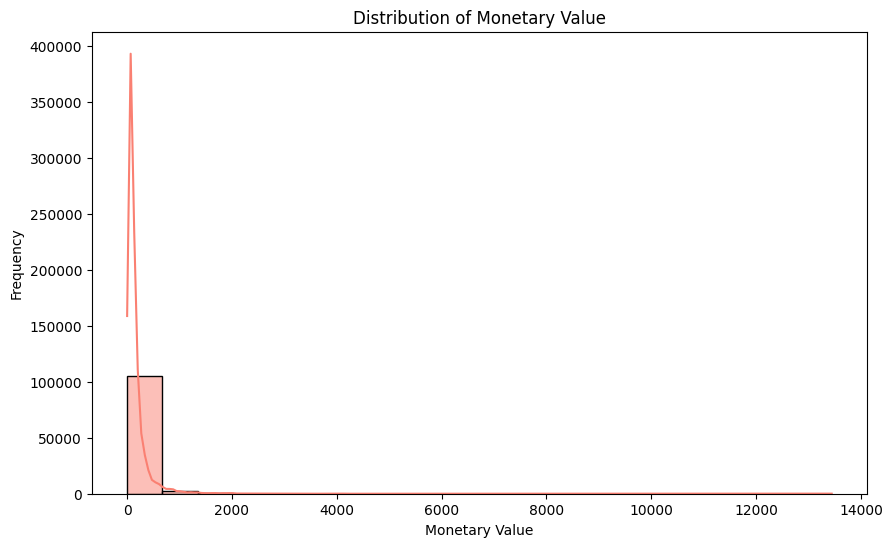

In [33]:
plt.figure(figsize=(10, 6))
sn.histplot(rfm_data['Monetary'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.show()

### Visualize Customer Segmentation

This visualization displays the number of customers in each segment that has been determined based on RFM scores. Each segment is labeled such as "Best Customers", "Loyal Customers", "Potential Loyalists", "New Customers", and "Others". This visualization helps us to understand the distribution of customers based on their purchasing behavior, thereby enabling you to create more targeted marketing strategies.

<ipython-input-34-91fd8b8420ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(y='Segment', data=rfm_data, order=rfm_data['Segment'].value_counts().index, palette=colors)


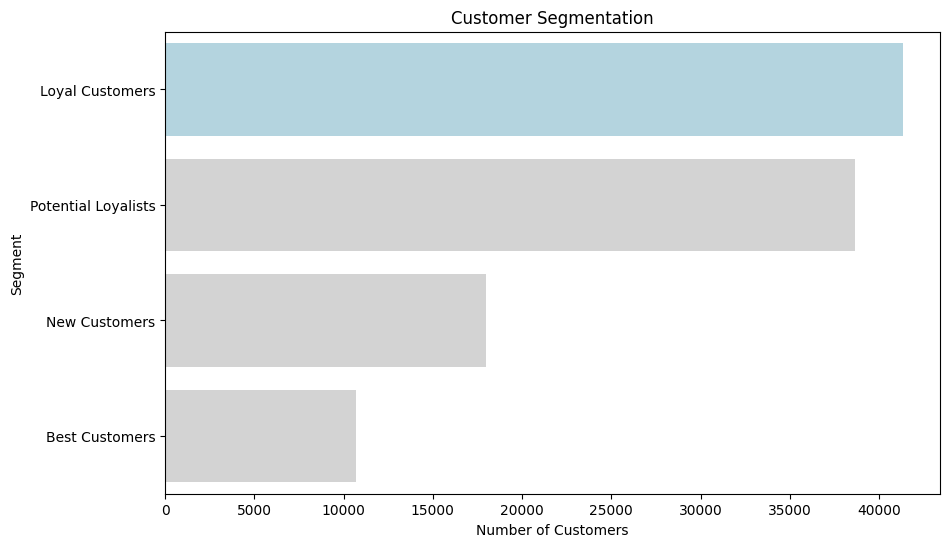

In [34]:
most_frequent_segment = rfm_data['Segment'].value_counts().idxmax()
colors = ['lightgray' if seg != most_frequent_segment else 'lightblue' for seg in rfm_data['Segment'].unique()]

plt.figure(figsize=(10, 6))
sn.countplot(y='Segment', data=rfm_data, order=rfm_data['Segment'].value_counts().index, palette=colors)
plt.title('Customer Segmentation')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
plt.show()

From visualization above, we know that mostly customers are classified to Loyal Customer, which mean that the product sales process has gone well.

In [35]:
cleaned_data.to_csv("cleaned_data.csv", index=False)

## Conclusion

- Conclution of question 1: The best selling product categories is cama mesa banho.
- Conclution of question 2: Customer distribution tends to be mostly in Sao Paulo, Brazil.